In [1]:
# Basic Libraries
#!pip install scikit-learn
#!pip install https://storage.googleapis.com/tensorflow/mac/cpu/tensorflow-1.8.0-py3-none-any.whl
#!pip install seaborn
import numpy as np
import random
from os import listdir
from PIL import Image
#!pip install np_utils
#!pip install keras
#!pip install tensorflow
# Preprocessing/Visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#from keras.utils import to_categorical
#from keras.utils.to_categorical
# Model Creation
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

from tensorflow import keras
from tensorflow.keras import layers

# Evaluation Metrics
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
base_path = "C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//"
files = listdir(base_path)

In [3]:
# Find the total length of data/Find out how many patients are there

print("Total Number of Patients: "+ str(len(files)))

Total Number of Patients: 225


In [4]:
# Saving the data into an array [image_path, class]

dataset = []

for i in range(len(files)):
    patient_id = files[i]
    for c in [0,1]:
        patient_path = base_path + patient_id
        class_path = patient_path + '/' + str(c) + '/'
        subfiles = listdir(class_path)
        for pic in subfiles:
            image_path = class_path + pic
            dataset.append([image_path,c])

In [5]:
print("Total Number of Images: " + str(len(dataset)))

Total Number of Images: 228262


In [6]:
# How each data is stored

dataset[0] 

['C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//10253/0/10253_idx5_x1001_y1001_class0.png',
 0]

In [7]:
total_length = len(dataset)
limit = total_length/4
dataset = dataset[:int(limit)]

len(dataset)

57065

In [8]:
# Get the size

# Load the image

image_path = dataset[0][0]
label = dataset[0][1]
image = Image.open(image_path)

# Get the size (dimensions) of the image

image_width, image_height = image.size

print(f"Image Width: {image_width} pixels")
print(f"Image Height: {image_height} pixels")

Image Width: 50 pixels
Image Height: 50 pixels


In [9]:
# Separate the data by class

NCdata = [img for img, label in dataset if label == 0]
Cdata = [img for img, label in dataset if label == 1]

NClabels = [label for img, label in dataset if label == 0]
Clabels = [label for img, label in dataset if label == 1]

In [10]:
# Get a sample of images from each type of dataset

negativeSample = random.sample(NCdata, 50)
positiveSample = random.sample(Cdata, 50)

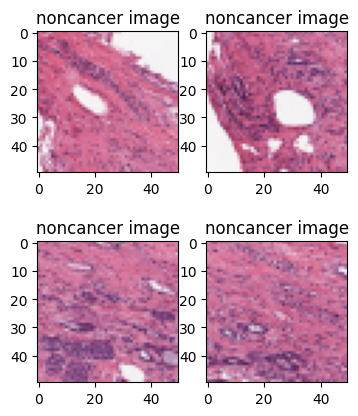

In [11]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img1 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//0//8863_idx5_x101_y1251_class0.png')
img2 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//0//8863_idx5_x101_y1301_class0.png')
img3 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//0//8863_idx5_x151_y1301_class0.png')
img4 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//0//8863_idx5_x201_y1301_class0.png')


fig = plt.figure(figsize=(4,5))
ax1 = fig.add_subplot(2,2,1)
plt.title('noncancer image')
ax1.imshow(img1)

ax2 = fig.add_subplot(2,2,2)
plt.title('noncancer image')
ax2.imshow(img2)

ax3 = fig.add_subplot(2,2,3)
plt.title('noncancer image')
ax3.imshow(img3)

ax4 = fig.add_subplot(2,2,4)
plt.title('noncancer image')
ax4.imshow(img4)



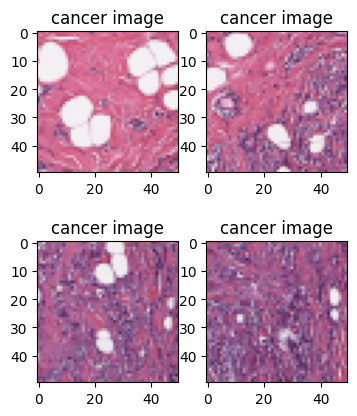

In [12]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img1 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//1//8863_idx5_x1001_y801_class1.png')
img2 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//1//8863_idx5_x1001_y851_class1.png')
img3 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//1//8863_idx5_x1001_y901_class1.png')
img4 = mpimg.imread('C://Windows//System32//project//project_binay classification//breast-histopathology-images//IDC_regular_ps50_idx5//8863//1//8863_idx5_x1001_y951_class1.png')


fig = plt.figure(figsize=(4,5))
ax1 = fig.add_subplot(2,2,1)
plt.title('cancer image')
ax1.imshow(img1)

ax2 = fig.add_subplot(2,2,2)
plt.title('cancer image')
ax2.imshow(img2)

ax3 = fig.add_subplot(2,2,3)
plt.title('cancer image')
ax3.imshow(img3)

ax4 = fig.add_subplot(2,2,4)
plt.title('cancer image')
ax4.imshow(img4)

In [13]:
# Get the class distribution

labels = ["Non-Cancer", "Cancer"]
counts = [len(NCdata), len(Cdata)]

total_samples = sum(counts)
percentages = [(count / total_samples) * 100 for count in counts]

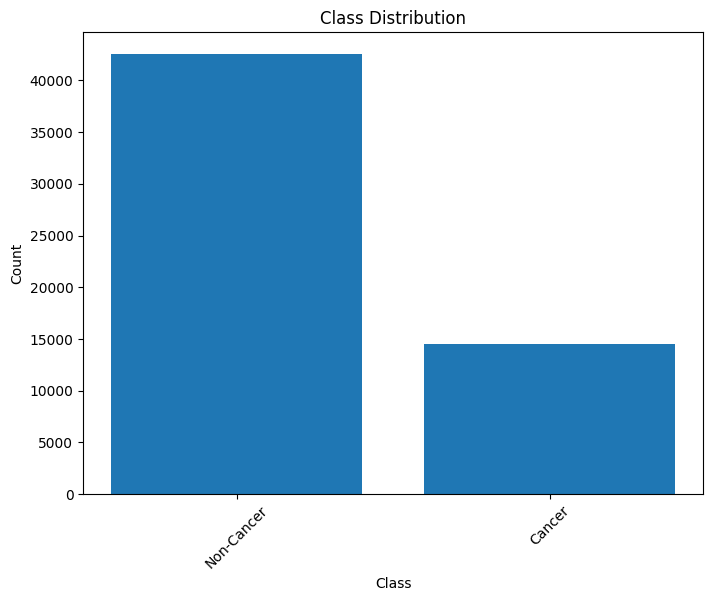

In [14]:
plt.figure(figsize=(8, 6))
plt.bar(labels, counts)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Distribution")
plt.xticks(rotation=45)
plt.show()

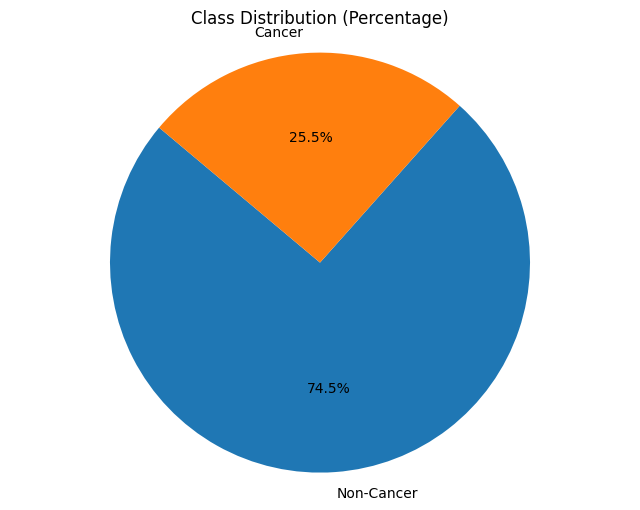

In [15]:
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Class Distribution (Percentage)")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [16]:
# Resizing using PIL Image

desired_size = (50,50)
resizedNC = []
resizedC = []

for image_path in NCdata:
    image = Image.open(image_path)
    nimage = image.resize(desired_size, Image.LANCZOS)  # Resize with anti-aliasing for better quality
    resizedNC.append(nimage)
    
for image_path in Cdata:
    image = Image.open(image_path)
    cimage = image.resize(desired_size, Image.LANCZOS)  # Resize with anti-aliasing for better quality
    resizedC.append(cimage)


In [17]:
# Normalize the Dataset pixel values to [0, 1] range

NCdataset = np.array([np.array(image) / 255.0 for image in resizedNC])
Cdataset = np.array([np.array(image) / 255.0 for image in resizedC])

In [18]:
# Shuffle the dataset

NCdataset = shuffle(NCdataset, random_state=42)
Cdataset = shuffle(Cdataset, random_state=42)

In [19]:
# Get the Shape of all dataset

print('NCdataset shape : {}' .format(NCdataset.shape))
print('Cdataset shape : {}' .format(Cdataset.shape))

NCdataset shape : (42531, 50, 50, 3)
Cdataset shape : (14534, 50, 50, 3)


In [20]:
# Split the data

# Split each dataset into training data and temporary data - 70:30

NCtrain, NCtemp, NCtrain_labels, NCtemp_labels = train_test_split(
    NCdataset, NClabels, test_size=0.3, stratify=NClabels, random_state=42
)

# Split the Cancer data
Ctrain, Ctemp, Ctrain_labels, Ctemp_labels = train_test_split(
    Cdataset, Clabels, test_size=0.3, stratify=Clabels, random_state=42
)

# Use the temporary data to split into Validation and Testing Data - 15:15
NCval, NCtest, NCval_labels, NCtest_labels = train_test_split(
    NCtemp, NCtemp_labels, test_size=0.5, stratify=NCtemp_labels, random_state=42
)

Cval, Ctest, Cval_labels, Ctest_labels = train_test_split(
    Ctemp, Ctemp_labels, test_size=0.5, stratify=Ctemp_labels, random_state=42
)

# Combine the two Non-Cancer Data and the Cancer Data to make one train_data, val_data, test_data
train_data = np.concatenate((NCtrain, Ctrain), axis=0)
train_labels = np.concatenate((NCtrain_labels, Ctrain_labels), axis=0)
val_data = np.concatenate((NCval, Cval), axis=0)
val_labels = np.concatenate((NCval_labels, Cval_labels), axis=0)
test_data = np.concatenate((NCtest, Ctest), axis=0)
test_labels = np.concatenate((NCtest_labels, Ctest_labels), axis=0)

In [21]:
# Reformat the shape for the labels

train_labels = to_categorical(train_labels, 2)
val_labels = to_categorical(val_labels, 2)
test_labels = to_categorical(test_labels, 2)

In [22]:
print('train_data shape : {}' .format(train_data.shape))
print('train_labels shape : {}' .format(train_labels.shape))
print('val_data shape : {}' .format(val_data.shape))
print('val_labels shape : {}' .format(val_labels.shape))
print('test_data shape : {}' .format(test_data.shape))
print('test_labels shape : {}' .format(test_labels.shape))

train_data shape : (39944, 50, 50, 3)
train_labels shape : (39944, 2)
val_data shape : (8560, 50, 50, 3)
val_labels shape : (8560, 2)
test_data shape : (8561, 50, 50, 3)
test_labels shape : (8561, 2)


In [23]:
model = tf.keras.Sequential([
    # Convolutional Layers
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (50, 50, 3)),
    tf.keras.layers.MaxPooling2D(strides = 2),
    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((3, 3),strides = 2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((3, 3),strides =2),
    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((3, 3),strides =2),
    
    # Flatten Layer
    tf.keras.layers.Flatten(),
    
    # Fully Connected Layers
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(2, activation = 'softmax')
])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 25, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 128)         0

In [25]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
history = model.fit(train_data, train_labels, validation_data = (val_data, val_labels), epochs = 80, batch_size = 75) #25

Epoch 1/80


533/533 [==============================] - 59s 106ms/step - loss: 0.4045 - accuracy: 0.8211 - val_loss: 0.3771 - val_accuracy: 0.8312
Epoch 2/80
533/533 [==============================] - 60s 113ms/step - loss: 0.3559 - accuracy: 0.8477 - val_loss: 0.3466 - val_accuracy: 0.8479
Epoch 3/80
533/533 [==============================] - 51s 96ms/step - loss: 0.3413 - accuracy: 0.8543 - val_loss: 0.3252 - val_accuracy: 0.8592
Epoch 4/80
533/533 [==============================] - 48s 90ms/step - loss: 0.3314 - accuracy: 0.8591 - val_loss: 0.3333 - val_accuracy: 0.8593
Epoch 5/80
533/533 [==============================] - 47s 88ms/step - loss: 0.3239 - accuracy: 0.8624 - val_loss: 0.3309 - val_accuracy: 0.8602
Epoch 6/80
533/533 [==============================] - 47s 88ms/step - loss: 0.3178 - accuracy: 0.8663 - val_loss: 0.3226 - val_accuracy: 0.8636
Epoch 7/80
533/533 [==============================] - 49s 93ms/step - loss: 0.3095 - accuracy: 0.8704 - val_loss: 0.3098 - val_accur

In [27]:
model.evaluate(test_data,test_labels)

268/268 [==============================] - 4s 15ms/step - loss: 1.1681 - accuracy: 0.8479


[1.1681491136550903, 0.8479149341583252]

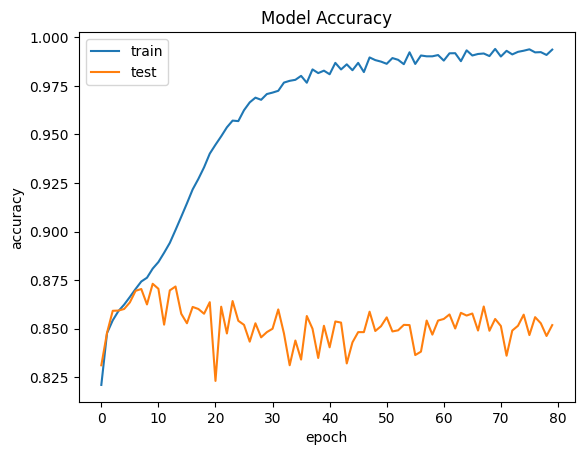

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

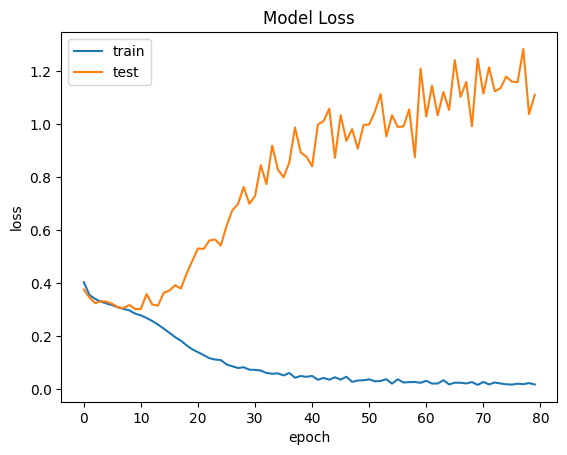

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
predict_data = model.predict(test_data)
predict_labels = np.argmax(predict_data, axis=1)

268/268 [==============================] - 4s 13ms/step


In [31]:
def convert_to_single_label(one_hot_labels):
    return np.argmax(one_hot_labels, axis=1)

# Convert train_labels
true_train_labels = convert_to_single_label(train_labels)

# Convert val_labels
true_val_labels = convert_to_single_label(val_labels)

# Convert test_labels
true_test_labels = convert_to_single_label(test_labels)

Accuracy: 0.85
Precision: 0.72
Recall: 0.65
F1-score: 0.69


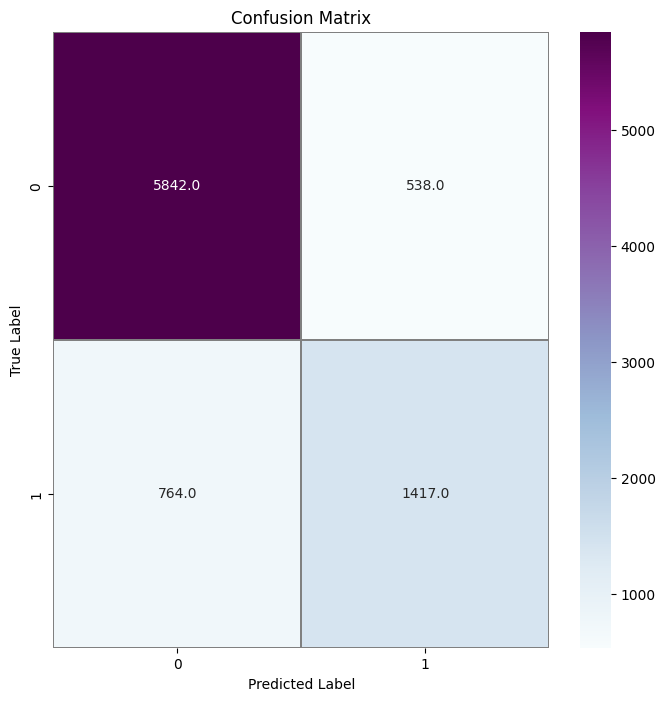

In [32]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate accuracy
accuracy = accuracy_score(true_test_labels, predict_labels)
print(f'Accuracy: {accuracy:.2f}')

# Calculate precision
precision = precision_score(true_test_labels, predict_labels)
print(f'Precision: {precision:.2f}')

# Calculate recall
recall = recall_score(true_test_labels, predict_labels)
print(f'Recall: {recall:.2f}')

# Calculate F1-score
f1 = f1_score(true_test_labels, predict_labels)
print(f'F1-score: {f1:.2f}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_test_labels, predict_labels)
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

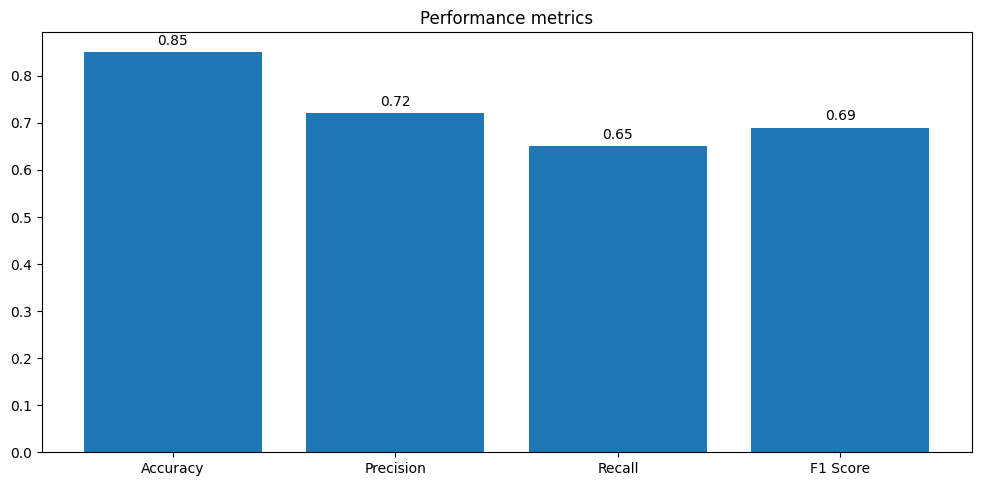

function to plot True,Predicted,Performance metrics


In [33]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Calculate accuracy
accuracy = round(accuracy_score(true_test_labels, predict_labels),2)

# Calculate precision
precision = round(precision_score(true_test_labels, predict_labels),2)

# Calculate recall
recall =round(recall_score(true_test_labels, predict_labels),2)


# Calculate F1-score
f1 = round(f1_score(true_test_labels, predict_labels),2)


# Create a figure object
fig = plt.figure(figsize=(12, 12))

# Add a subplot to the figure
ax = fig.add_subplot(2,1,1)

# Create the bar plot
bars = ax.bar(['Accuracy','Precision','Recall','F1 Score'],[accuracy,precision,recall,f1])

# Loop through the bars and add annotations
for bar in bars:
  height = bar.get_height()
  ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),textcoords="offset points", ha='center', va='bottom')

# Show the plot
plt.title('Performance metrics')
plt.show()
print('function to plot True,Predicted,Performance metrics')

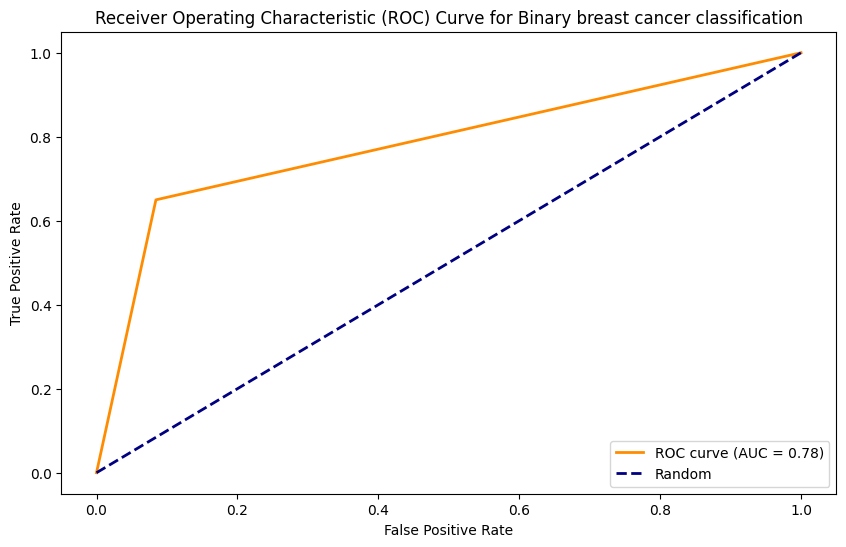

In [34]:
#!pip install scikit-learn matplotlib tensorflow
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(true_test_labels, predict_labels)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Binary breast cancer classification')
plt.legend(loc='lower right')
plt.show()